# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [42]:
X,y,c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True, random_state=7)

In [43]:
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],    ## Dimension 1
        'x2': X[:,1],   ## Dimension 2
        'y' : y          ## Cluster al que pertenece
    }
)

In [44]:
## Para ver los centroides
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

## Visualización de datos

<AxesSubplot:xlabel='x1', ylabel='x2'>

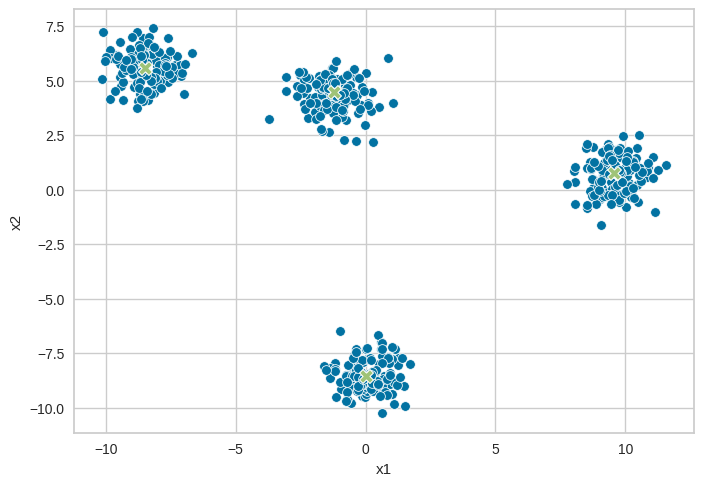

In [45]:
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
 # Se grafican los datos y su centroide Real.
 

## Aplicando K-means

In [46]:
kmeans = KMeans(n_clusters=3)
df_cluster = kmeans.fit_predict(X)
df_blobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_

df_k_means_center= pd.DataFrame(
    {
        'x1' : k_means_centers[:,0],
        'x2' : k_means_centers[:,1]
    }
)

In [47]:
df_blobs

,x1,x2,y,cluster
0,-0.320970,4.338705,1,1
1,-2.231586,3.271233,1,1
2,-8.559968,4.477236,0,1
3,0.111800,3.987295,1,1
4,-0.557967,-9.808574,3,2
...,...,...,...,...
495,9.500290,1.352141,2,0
496,-8.628119,4.175966,0,1
497,-8.628919,6.156211,0,1
498,-1.916354,4.867863,1,1


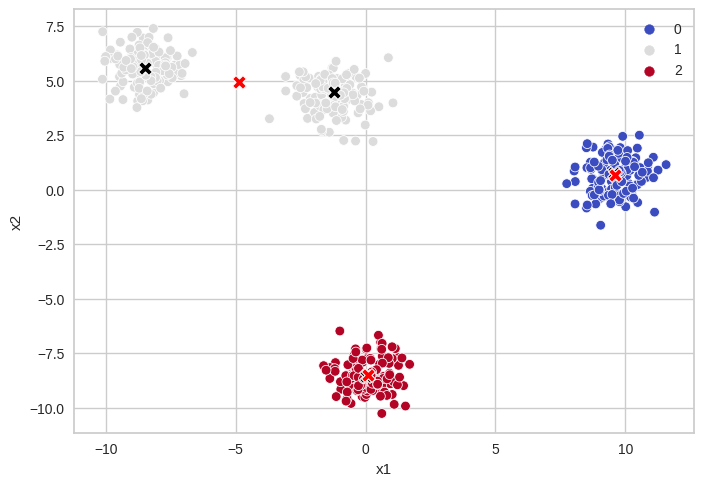

In [48]:
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100, color='black')
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='X', s=100, color='red')

plt.show()

Notemos que los centroides originales alineados con los ajustados con kmeans, notemos que si cambiamos los k's, los centroides se ajustan a la cantidad de clusters que le indiquemos. en esta imagen se ve cómo la escogencia del numero de clusters se ve de inmediato en la gráfica.

#### **Aporte de un estudiante**

Detallen bien su escogencia del número de clusters cuando evalúen el rendimiento del modelo con el silhouette score. Aquí por ejemplo generé los datos con cuatro centroides como en la clase, e hice el entrenamiento del modelo con tres clusters y obtuve lo siguiente:

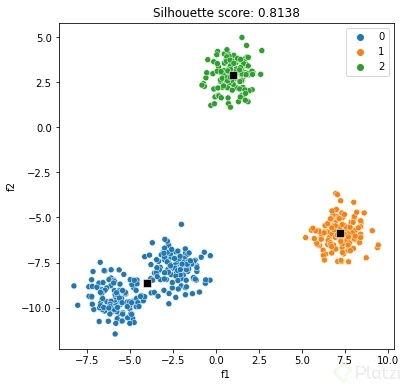

También realicé el entrenamiento con cuatro clusters y obtuve lo siguiente:

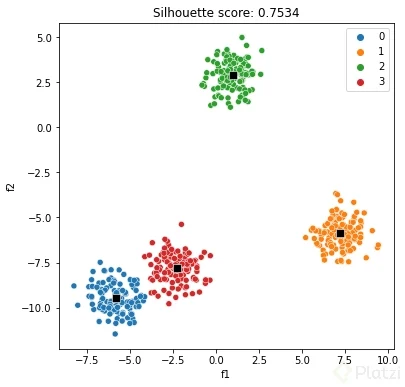

Observen que el silhouette score fue mejor (más cercano a 1) con tres clusters, pero de entrada sabemos que en realidad en los datos hay cuatro clusters diferentes, así que sí, no se confíen solo en la primera métrica que saquen, hay que detallar más los resultados :)

## Encontrando el valor de K

1. Método del codo: distancia de cada punto al centroide en que se encuentra y esto se eleva al cuadrado,  y se saca el promedio de todos los puntos, y se hace para cada k, y se grafica, y se busca el punto donde la gráfica se asemeje a un codo, y ese es el valor de k.

Encontrar el punto en que con menos cluster tenga una disminución que pueda satisfacer la necesidad

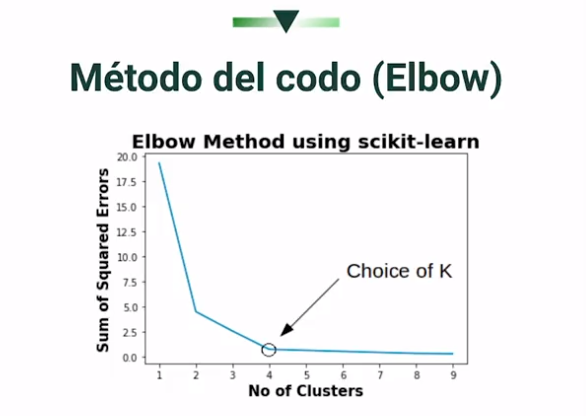
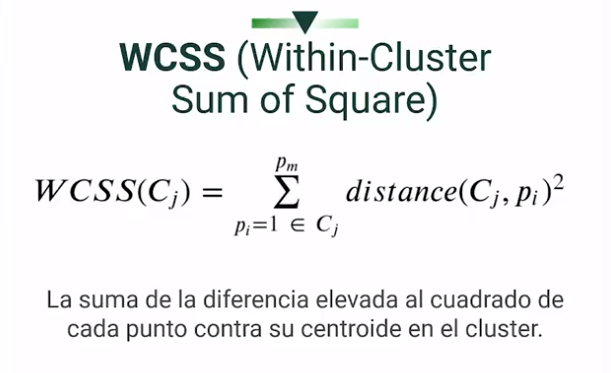
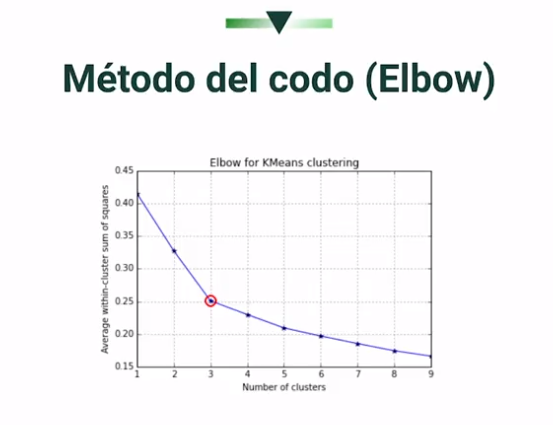


2. Método de la silueta: se calcula el silhouette score para cada k, y se busca el valor de k que tenga el silhouette score más alto.

In [49]:
## Funcion que permite observar como se comportan los clusters segun la cantidad que se definan

def vis_cluster(k):
    kmeans = KMeans(n_clusters=k)
    df_cluster = kmeans.fit_predict(X)
    df_blobs['cluster'] = df_cluster
    k_means_centers = kmeans.cluster_centers_

    df_k_means_center= pd.DataFrame(
        {
            'x1' : k_means_centers[:,0],
            'x2' : k_means_centers[:,1]
        }
    )

    plt.figure(figsize=(10,3))
    sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
    sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100, color='black')
    sns.scatterplot(data=df_k_means_center, x='x1', y='x2', marker='X', s=100, color='red')
    plt.title(f'Clusters with {k} Clusters')

    plt.show()

3


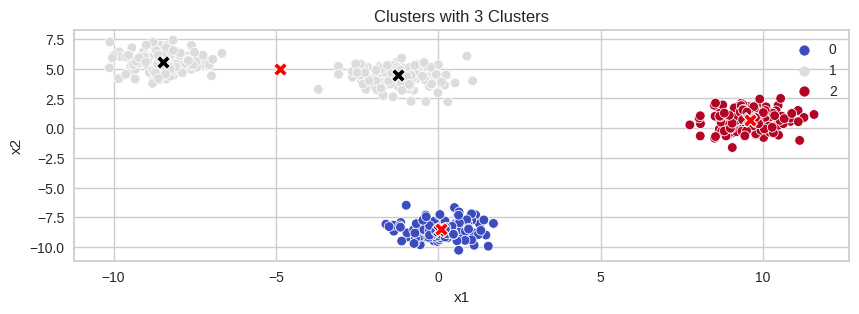

4


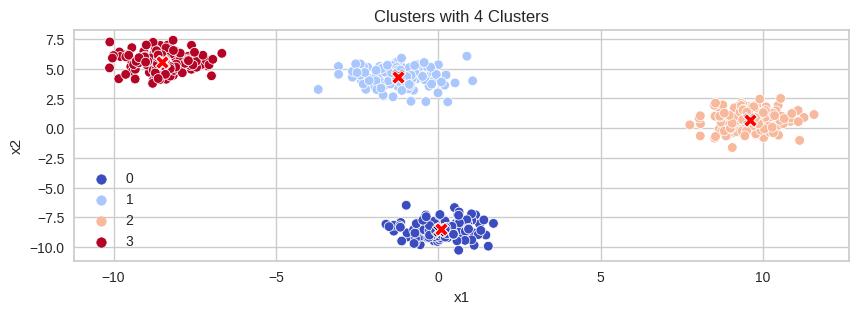

5


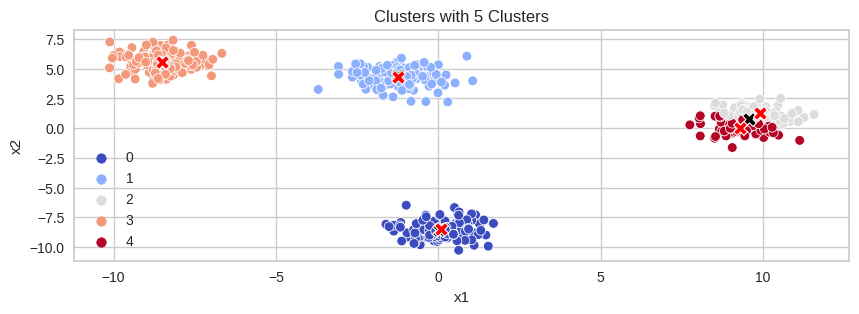

6


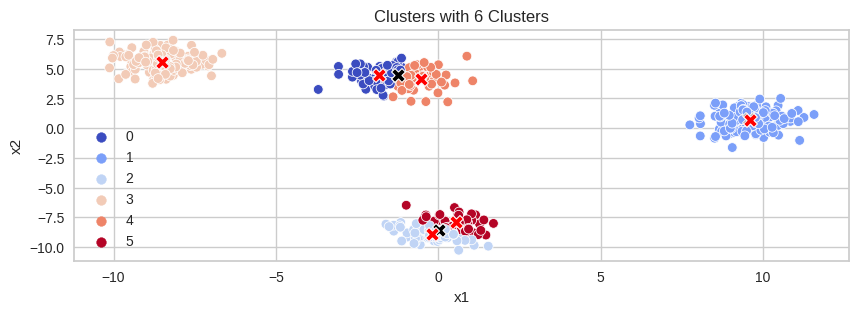

In [50]:
for k_clusters in range(3,7):
    print(k_clusters)
    vis_cluster(k_clusters)

### Encontrando el valor de K

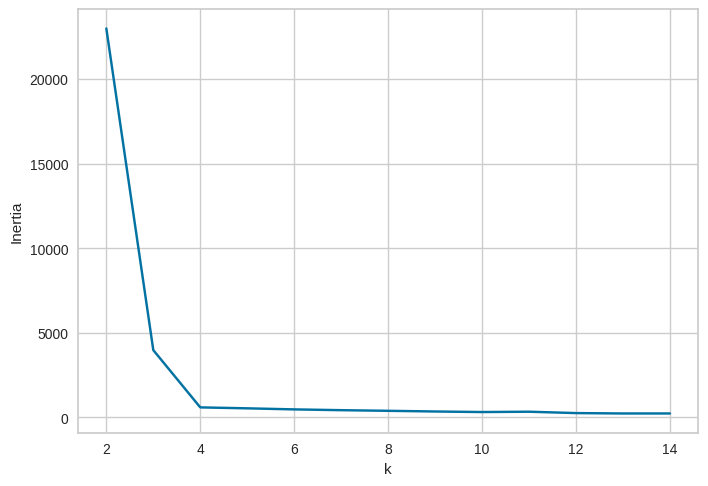

In [51]:
## Con elbow method

sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)                    ## se genera para dicha cantidad de clusters
    km = km.fit(X)                               ## Solo se entrena, mas no predice
    sum_of_squared_distances.append(km.inertia_) ## inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

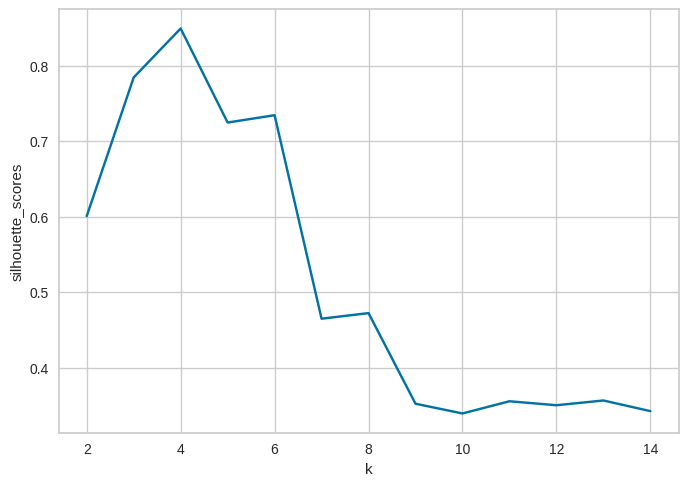

In [52]:
silhouette_scores = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)                    ## se genera para dicha cantidad de clusters
    km = km.fit(X)                               ## Solo se entrena, mas no predice
    y = km.predict(X)                           ## Se predice dado que para esta métrica sí se necesita la prediccion
    silhouette_scores.append(silhouette_score(X,y)) ## inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_scores')
plt.show()

## Evaluando clusters con K-means

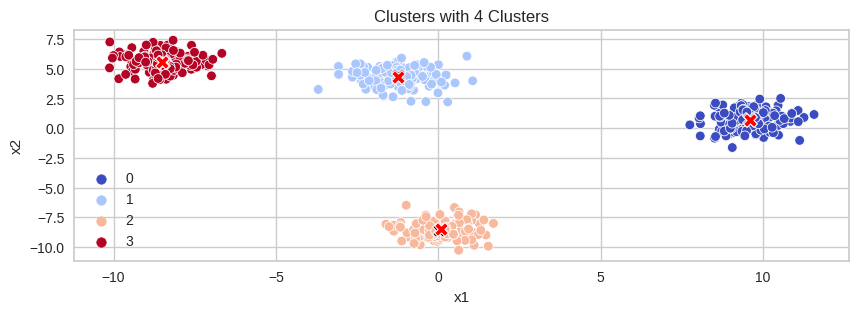

In [53]:
vis_cluster(4)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

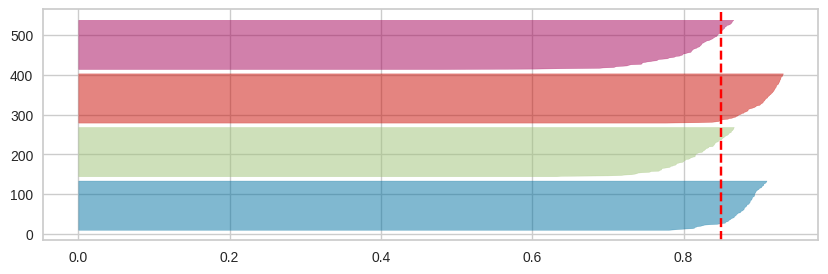

In [62]:
km = KMeans(n_clusters=4)
 
plt.figure(figsize=(10,3)) 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)

El gráfico de silueta muestra la medida de cuán cerca está cada punto en un cluster con los puntos en los clusters vecinos. Aquí hay algunos puntos clave que se pueden interpretar del gráfico:

Anchura de las siluetas: La medida de silueta varía de -1 a 1. Los valores cercanos a +1 indican que el punto está lejos de los puntos del cluster vecino. Un valor de 0 indica que el punto está muy cerca de la frontera del siguiente cluster. Un valor negativo indica que esos puntos podrían haber sido asignados al cluster incorrecto.
Tamaño de los clusters: Cada barra representa un punto de datos en el espacio de características, y la longitud de la barra indica el valor de la silueta de ese punto. Las barras más largas indican que los puntos están bien situados dentro de su cluster, mientras que las barras más cortas indican puntos que no están tan bien ajustados.
Coeficiente de silueta promedio: La línea de puntos rojos indica el valor promedio de la silueta para cada cluster. Si todas las líneas de puntos están por encima de la marca de valor cero y son relativamente largas, esto sugiere que la solución de clustering es buena y que los clusters están bien separados.
En tu gráfico:

El coeficiente medio de la silueta parece ser alrededor de 0.7, lo cual es bastante bueno, indicando que en promedio, los puntos están bien clasificados dentro de su propio cluster y lejos de otros clusters.
Sin embargo, hay una notable cantidad de puntos (barras) por debajo del promedio, especialmente en el tercer cluster (de abajo hacia arriba), lo que podría sugerir que algunos puntos podrían estar mejor clasificados.
Los clusters no tienen un número uniforme de puntos, lo que es típico en datos reales, pero algo a tener en cuenta ya que puede reflejar la densidad natural de las regiones del espacio de datos.
La interpretación general sería que el clustering realizado parece ser relativamente adecuado, pero podrías experimentar con diferentes números de clusters para ver si hay una mejora significativa en la cohesión interna de los clusters y la separación entre ellos.